# Data Variation
## Exercise Instructions

* Complete all cells as instructed, replacing any ??? with the appropriate code

* Execute Jupyter **Kernel** > **Restart & Run All** and ensure that all code blocks run without error

You will explore ways to describe and quantify the variation or how distant the data points are from each other. 

## R Features
* var()
* sd()
* sample_n()
* runif()
* rnorm()
* rt()
* geom_histogram()
* geom_density()
* geom_violin()
* geom_vline()
* Others: 
   * library()
   
   * c()
   * str_c()
   * cat()
   * select()
   * glimpse()
   * print()
   * head()
   * ggplot()
   * geom_point()
   * labs()

## Datasets
* mpg

In [2]:
# Load libraries
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.2.5
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Create sample data

In [3]:
df <- mpg %>% select(cyl, displ, hwy)
df %>% glimpse()

Observations: 234
Variables: 3
$ cyl   <int> 4, 4, 4, 4, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, …
$ displ <dbl> 1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.1, 1.8, 1.8, 2.0, 2.0, 2.8, 2.8…
$ hwy   <int> 29, 29, 31, 30, 26, 26, 27, 26, 25, 28, 27, 25, 25, 25, 25, 24,…


# nrow(), ncol(), length(), dim()
Get the size or length of a vector or data frame

In [5]:
# Get the row and column count of df
# Hint: nrow(), ncol(), length(), dim(), glimpse()
print("nrow():")
nrow(df)

print("ncol():")
ncol(df)

print("dim():")
dim(df)

print("length(df):")
length(df)

print("length(df$cyl)")
length(df$cyl)

print("glimpse()")
glimpse(df)

[1] "nrow():"


[1] 234

[1] "ncol():"


[1] 3

[1] "dim():"


[1] 234   3

[1] "length(df):"


[1] 3

[1] "length(df$cyl)"


[1] 234

[1] "glimpse()"
Observations: 234
Variables: 3
$ cyl   <int> 4, 4, 4, 4, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, …
$ displ <dbl> 1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.1, 1.8, 1.8, 2.0, 2.0, 2.8, 2.8…
$ hwy   <int> 29, 29, 31, 30, 26, 26, 27, 26, 25, 28, 27, 25, 25, 25, 25, 24,…


Notice that length of a data frame returns the number of columns. The length of a column returns the number of rows in the data frame. Dim returns a vector with rows and columns.

# min(), max(), range()

In [6]:
# Get the min, max, and range of df$cyl
# Hint: min(), max(), range()
print("min")
min(df$cyl)

print("max")
max(df$cyl)

print("range")
range(df$cyl)

[1] "min"


[1] 4

[1] "max"


[1] 8

[1] "range"


[1] 4 8

Notice the range is min and max in a vector.

# Calculate sum() of vectors and dataframe columns
The sum() as an example of many statistics functions. Let's get familiar with the different context that these vectorized functions can be used in. 

1. The first is when the data is a vector. It could be a varaible that contains a vector of data. A similar form is a dataframe column. These columns can be treated as vectors as if they were saved as a new variable. It used the form dataframe_name$column_name. This is the dollar sign '$' notation like sum(dataframe_name$column_name) or dataframe_name$column_name %>% sum() if you prefer the pipe version.

1. A second context is using the function inside a dataframe pipeline context such as mutate(). mutate() will pass the data into the function for that column name. Due to the way the tidyverse works, you just specify the 'bare' column name. No double quotes. No dollar sign. The form for this is dataframe_name %>% mutate(new_column_name = sum(column_name)) and the pipe version works too dataframe_name %>% mutate(new_column_name = column_name %>% sum())

1. A third context is a group of columns in a dataframe where the function is applied to many at once. This is passing a number of vectors one-by-one into the function. Or you can think of it as *applying* the function to several columns. This is what the apply() function does in base R with the equivlaent tidyverse functions being map() and walk(). These are generic functions that can apply to data other than dataframes. Since we try to stick to dataframes, there are tidyverse dplyr verbs that can be used for this. We'll focus on this context. The verbe are 'if' and 'at' and 'all'. For example to apply a fuction to all dataframe columns, add '\_all' to the end of the dplyr function like dataframe_name %>% summarize_all(function_name_without_parenthesis).

In [10]:
# Calculate the sum of the columns
# Hint: sum() with dataframe column reference of dataframe_name$column_name
sum(df$cyl)  # df$cyl
sum(df$displ ) # df$displ
df$hwy %>% sum() # df$hwy

[1] 1378

[1] 812.4

[1] 5485

In [11]:
# Calculate the sum of cyl, displ, and hwy columns in dataframe df
# Hint: summarize(), sum()
df %>% summarize(cyl_sum = sum(cyl),
                displ_sum = sum(displ),
                hwy_sum = sum(hwy))

cyl_sum,displ_sum,hwy_sum
<int>,<dbl>,<int>
1378,812.4,5485


In [18]:
# Calculate the sum of all columns in dataframe df
# Hint: summarize_all(), sum without the parenthesis
df %>% summarize_all(sum)

cyl,displ,hwy
<int>,<dbl>,<int>
1378,812.4,5485


# variance 
The variance is a measure of how close together or how far apart each data point is relative to the other data points. Is is often referred to as the spread of the data. 

In [ ]:
# Display help on var()
?var()

# cor {stats}	R Documentation
Correlation, Variance and Covariance (Matrices)

## Description

var, cov and cor compute the variance of x and the covariance or correlation of x and y if these are vectors. If x and y are matrices then the covariances (or correlations) between the columns of x and the columns of y are computed.

## Usage

* var(x, y = NULL, na.rm = FALSE, use)

In [20]:
# Calculate the variance of the columns
# Hint: var()
var(df$cyl)  # df$cyl
var(df$displ) # df$displ
df$hwy %>% var() # df$hwy

# Calculate the variance of all columns
# Hint: summarize_all(), var()
df %>% summarize_all( var )

[1] 2.597043

[1] 1.669158

[1] 35.45778

cyl,displ,hwy
<dbl>,<dbl>,<dbl>
2.597043,1.669158,35.45778


# standard deviation 
Standard deviation is the square root of the variance. This makes the result more meaningful at it is in the same units as the underlying data column. Variance is in squared units.

In [21]:
# Display help on sd()
? sd()

# sd {stats}	R Documentation
Standard Deviation

## Description

This function computes the standard deviation of the values in x. If na.rm is TRUE then missing values are removed before computation proceeds.

## Usage

sd(x, na.rm = FALSE)
## Arguments

* x	a numeric vector or an R object which is coercible to one by as.double(x).
* na.rm	logical. Should missing values be removed?
## Details

Like var this uses denominator n - 1.

In [27]:
# Calculate the standard deviation of the columns
# Hint: sd()
sd(df$cyl)  # df$cyl
sd(df$displ) # df$displ
sd(df$hwy) # df$hwy

# Calculate the standard deviation of all columns
# Hint: summarize_all(), sd()
df %>% summarize_all(sd)

# Compare to the square root of the variance
# Calculate the square root of variance of all columns
# Hint: summarize_all(), var(), mutate_all(), sqrt()
df %>% summarize_all(var) %>%mutate_all(sqrt)

[1] 1.611534

[1] 1.291959

[1] 5.954643

cyl,displ,hwy
<dbl>,<dbl>,<dbl>
1.611534,1.291959,5.954643


cyl,displ,hwy
<dbl>,<dbl>,<dbl>
1.611534,1.291959,5.954643


Notice it is using the n - 1 sample definition, not the population. Confirm that the standard deviation is indeed the square root of the variance.

# Standard error
The standard error is the standard deviation divided by the square root of the row count (n). This will be important later when performing hypothsis testing. It is related to standard deviation so it fits here nicely. It is the standard deviation divided by the square root of the sample size (n). 

In [28]:
# Calculate the standard error of the columns
# Hint: sd(column) / sqrt(length(column))
sd(df$cyl) / sqrt(length(df$cyl)) # df$cyl
sd(df$displ) / sqrt(length(df$displ)) # df$displ
sd(df$hwy ) / sqrt( length(df$hwy)) # df$hwy

[1] 0.1053493

[1] 0.084458

[1] 0.3892672

# scale and z-score
z-score is (value - mean()) / sd() which centers the mean at 0 and scales to standard deviations. The default scale function transforms values into z-scores

In [ ]:
# Display help on scale()
?scale()

# scale {base}	R Documentation
Scaling and Centering of Matrix-like Objects

## Description

scale is generic function whose default method centers and/or scales the columns of a numeric matrix.

## Usage

scale(x, center = TRUE, scale = TRUE)

In [29]:
# Calculate the z score of df$displ 
# using formula (value - mean()) / sd()
# Display the first few rows
# Hint: mean(), sd(), head()
((df$displ - mean(df$displ)) / sd(df$displ)) %>% head()

# Calculate the z score of df$displ 
# using scale() for comparison
# Display the first few rows
# Hint: scale()
scale(df$displ) %>% head()  # df$displ

[1] -1.2939999 -1.2939999 -1.1391962 -1.1391962 -0.5199816 -0.5199816

-1.2939999
-1.2939999
-1.1391962
-1.1391962
-0.5199816
-0.5199816


Notice that they produce equivalent values. scale() returned a matrix object which made it print a bit differently.

# Scale all values in a data frame
We can use the '\_if' verb in the dplyr function to apply a function to just a subset of dataframe columns. Here we want to apply the scale function to only the numeric columns. dataframe_name %>% mutate_if(is.numeric, scale) is a quick way to do this. Notice it takes two functions. The first, is.numeric returns a boolean for each column in the dataframe. If the value is True, then that column gets passed to the second function, scale. This is done for all columns piped in from the dataframe. Note that when applying functions, you leave off the parenthesis for those functions.

In [33]:
# Scale all numeric values of mpg
# Store result in df_scaled
# Hint: mutate_if(), is.numeric(), scale()
df_scaled <- mpg %>% mutate_if(is.numeric,scale)

# Explore result
# Hint: glimpse(), summary()
df_scaled %>% glimpse() %>% summary()

Observations: 234
Variables: 11
$ manufacturer <chr> "audi", "audi", "audi", "audi", "audi", "audi", "audi", …
$ model        <chr> "a4", "a4", "a4", "a4", "a4", "a4", "a4", "a4 quattro", …
$ displ        <dbl[,1]> <matrix[26 x 1]>
$ year         <dbl[,1]> <matrix[26 x 1]>
$ cyl          <dbl[,1]> <matrix[26 x 1]>
$ trans        <chr> "auto(l5)", "manual(m5)", "manual(m6)", "auto(av)", "aut…
$ drv          <chr> "f", "f", "f", "f", "f", "f", "f", "4", "4", "4", "4", "…
$ cty          <dbl[,1]> <matrix[26 x 1]>
$ hwy          <dbl[,1]> <matrix[26 x 1]>
$ fl           <chr> "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "…
$ class        <chr> "compact", "compact", "compact", "compact", "compact", "…


 manufacturer          model                 displ.V1             year.V1      
 Length:234         Length:234         Min.   :-1.4488036   Min.   :-0.997861  
 Class :character   Class :character   1st Qu.:-0.8295889   1st Qu.:-0.997861  
 Mode  :character   Mode  :character   Median :-0.1329724   Median : 0.000000  
                                       Mean   : 0.0000000   Mean   : 0.000000  
                                       3rd Qu.: 0.8732515   3rd Qu.: 0.997861  
                                       Max.   : 2.7308955   Max.   : 0.997861  
        cyl.V1           trans               drv                  cty.V1       
 Min.   :-1.1721058   Length:234         Length:234         Min.   :-1.846587  
 1st Qu.:-1.1721058   Class :character   Class :character   1st Qu.:-0.671760  
 Median : 0.0689474   Mode  :character   Mode  :character   Median : 0.033136  
 Mean   : 0.0000000                                         Mean   : 0.000000  
 3rd Qu.: 1.3100006                     

Notice the summary has a mean of 0 for the numeric columns with a range in the + / - single digits.

# Visualizing data variation using histograms
If we have a continuous variable and want to understand how spread out the values are from each other, the histogram is my first choice. A histogram counts the number of data points in equally spaced ranges called bins. 

Let's give it a try with geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


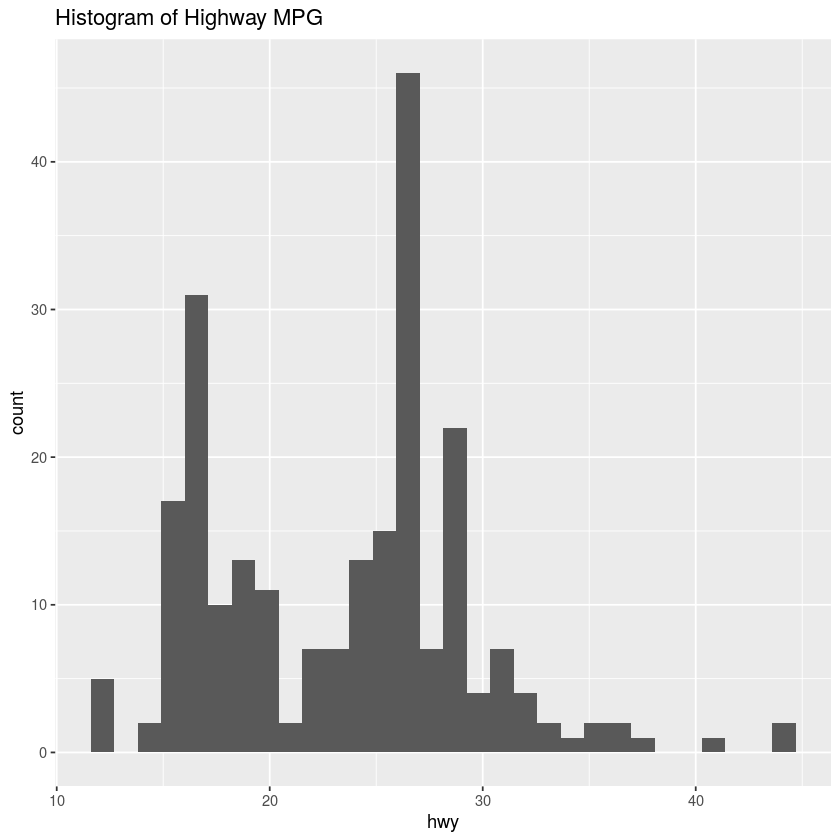

In [34]:
# Histogram of mpg x=hwy
# Hint: geom_histogram()
mpg %>% ggplot(aes(x=hwy )) + 
   geom_histogram() +
   labs(title="Histogram of Highway MPG")

Notice the warning that 30 bins were used. In looking at the plot, it seems that there are too many bins. We can do better.

# Histogram with binwidth defined
Let's specify a binwidth. This would be the width in highway miles per gallon. Let's try 5 mpg. I also want to see the bins a bit more clearly so let's adjust the color and fill and theme. Color is the outline. Fill is the inside. Theme makes it easy to change the background without having to find a detailed reference of how to change individual plot properties. 

My quick and dirty histogram formatting is color="black", fill="gray" and theme_classic(). Let's also define a variable for the binwidth so it is easy to change and try out different values. Since the shape can change drastically depending on the binwidth, it is important to convey the binwidth on the plot. I use the subtitle and str_c() with the binwidth variable to do this automatically.

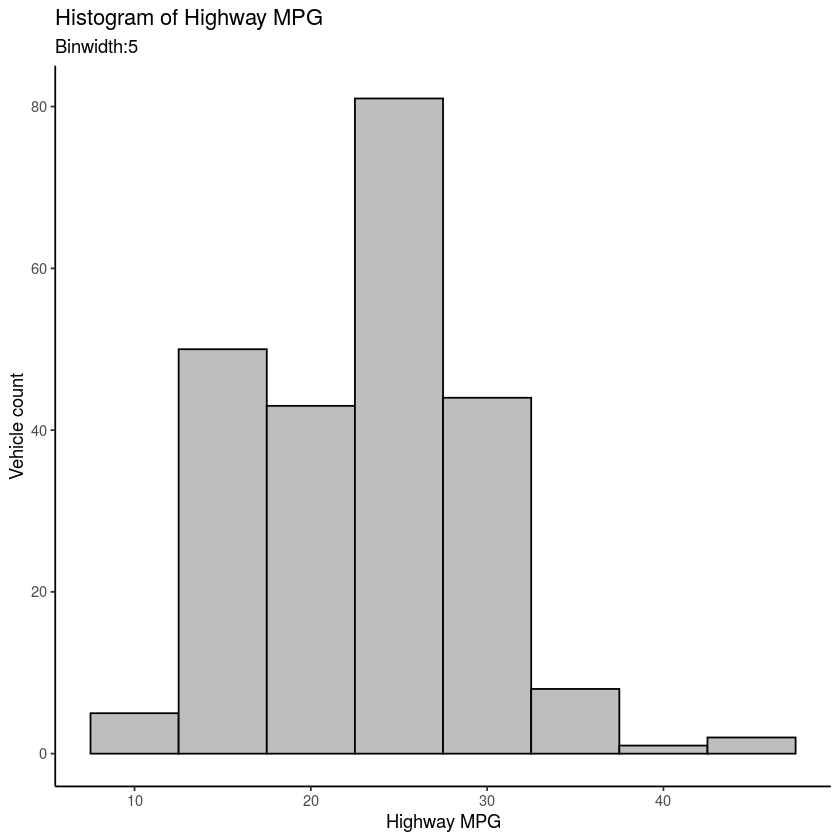

In [39]:
# Histogram of mpg x=hwy
# Create a variable for binwidth and use it to adjust the binwidth
# Display the binwidth in the subtitle
# Change the bars to gray with black outline and white background
bw <- 5
mpg %>% ggplot(aes(x=hwy)) + 
   geom_histogram(binwidth= bw , color= 'black' , fill= 'gray' ) +
   theme_classic() +
   labs(title="Histogram of Highway MPG",
       subtitle=str_c("Binwidth:", bw ),
       x="Highway MPG", y="Vehicle count")

That looks much better. 

# Frequency Plot
If you are looking for the shape of a histogram, but without the bars, try the frequency plot, geom_freqpoly(). It take the same binwidth parameter. You an just replace geom_histogram() with geom_freqpoly() without the fill parameter.

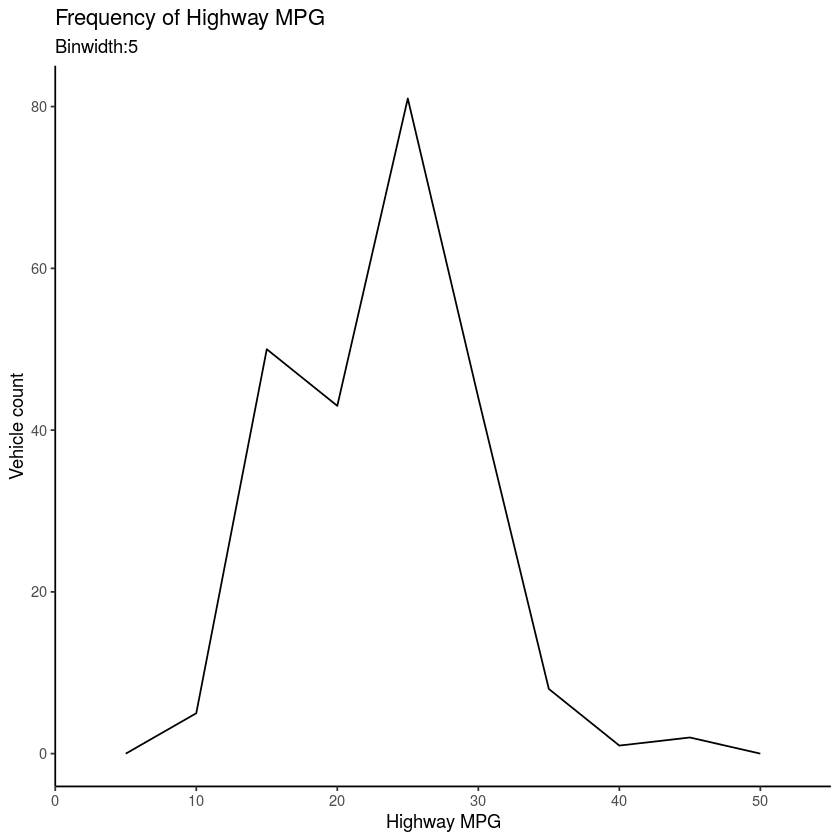

In [42]:
# Frequency plot of mpg x=hwy
# Create a variable for binwidth and use it to adjust the binwidth
# Display the binwidth in the subtitle
# Hint: geom_freqpoly()
bw <- 5
mpg %>% ggplot(aes(x=hwy)) + 
   geom_freqpoly(binwidth=bw, color="black") +
   theme_classic() +
   labs(title="Frequency of Highway MPG",
       subtitle=str_c("Binwidth:", bw),
       x="Highway MPG", y="Vehicle count")

Does the frequency plot look like the shape of the histogram for a matching binwidth? I think it does.

# Probability Density
If you are looking for a smoother, version of the frequency plot, look no further than geom_density(). It is the geom_smooth version of geom_freqpoly. Density plots are good at visualizing the spread of continuous data in terms of probability...which is an area plot with the total area summing to 1. This means that the y axis reflects the probability of that value occurring in the underlying data distribution.

Let's give it a try.

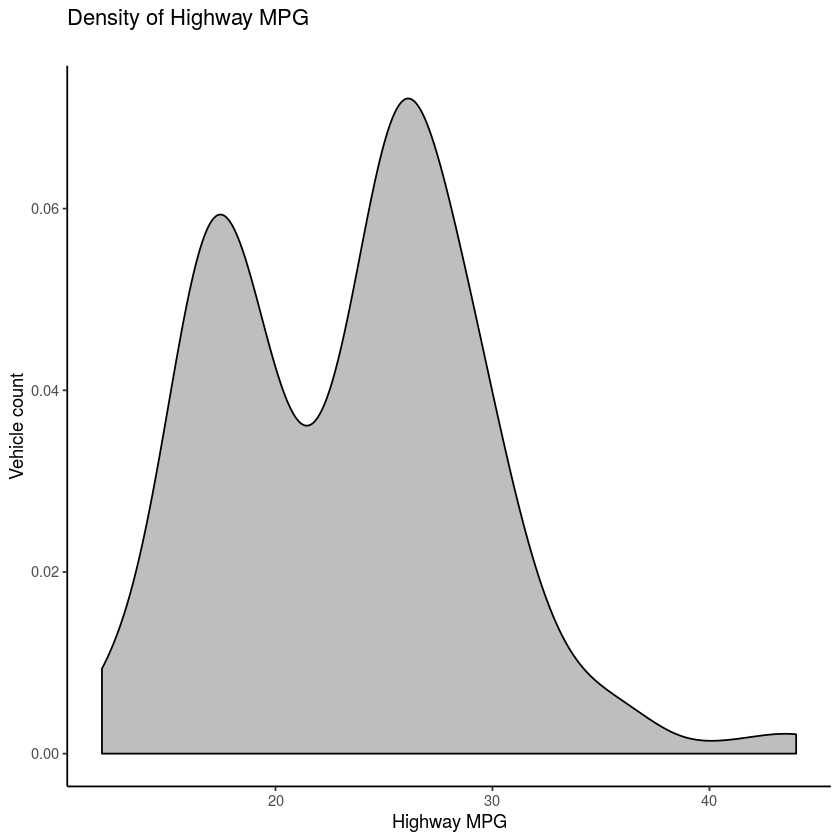

In [44]:
# Density of mpg x=hwy
# Use fill="blue" to show the area
# Hint: geom_density() with fill
mpg %>% ggplot(aes(x=hwy)) + 
   geom_density(fill= "gray" ) +
   theme_classic() +
   labs(title="Density of Highway MPG",
       subtitle="",
       x="Highway MPG", y="Vehicle count")

How does this shape compare to the prior histogram? Does it capture the pattern?

# geom_rug()
I often find the density plot is missing the number of specific points. The problem is that it connects the dots in a line so there is 'area' that, in some cases doesn't include any data in that region. We can overlay a strip of tick marks to indicate a data point to the bottom of a density plot.

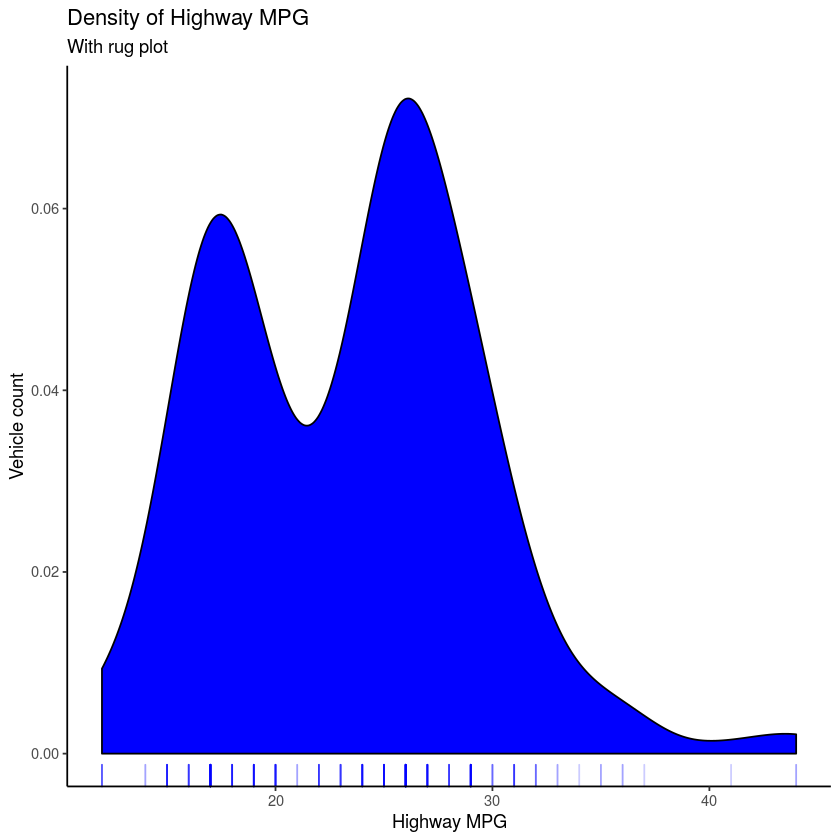

In [45]:
# Density of mpg x=hwy
# Add a translucent(0.2) rug plot, colored blue so you can spot it.
# Hint: geom_rug() with alpha
mpg %>% ggplot(aes(x=hwy)) + 
   geom_density(fill="blue") +
   geom_rug(alpha= 0.2 , color="blue") +
   theme_classic() +
   labs(title="Density of Highway MPG",
       subtitle="With rug plot",
       x="Highway MPG", y="Vehicle count")

It is subtle, but adds a bit of information.

# Histogram + Density + Rug
Is it possible to have too much of a good thing? Let's find out. We'll combine a histogram, an density plot and a rug all together. Since both histogram and density share the same y axis, we need to use density as the y axis for the density plot to work. We then need to tell geom_histogram() to use the density calculation. 

To do this you add ..density.. like geom_histogram(mapping = aes(y=..density..))

Yes the two preceding and trailing periods are necessary. It was Wickham's way to avoid column naming conflicts with the source dataframe.

In [ ]:
# Histogram and Density of mpg x=hwy
# A blue translucent(0.2) rug plot
# A blue density fill with alpha= 0.2
# Hint: geom_rug() with alpha, geom_density() with alpha
# Hint: geom_histogram(mapping = aes(y=..density..), ...)
bw <- 5
mpg %>% ggplot(aes(x=hwy)) + 
   ??? (mapping = aes(y=..density..), binwidth=bw, color="black", fill="gray") +
   ??? (fill="blue", alpha=0.2) +
   ??? (alpha=0.2, color="blue") +
   theme_classic() +
   labs(title="Density of Highway MPG",
       subtitle=str_c("Binwidth:", bw),
       x="Highway MPG", y="Vehicle count")

Waht do you think? I think I can manage understanding all three plots together. Presenting to the business, I would always use a histogram with counts. That is the easiest to understand among the three.

# Violin plot by categorical variable
Another plot to show the distribution of the data is the violin plot, geom_violin(). It is a cross between a boxplot and a density plot. It works best with a categorical variable and a continuous variable like the boxplot. Let's give it a try.

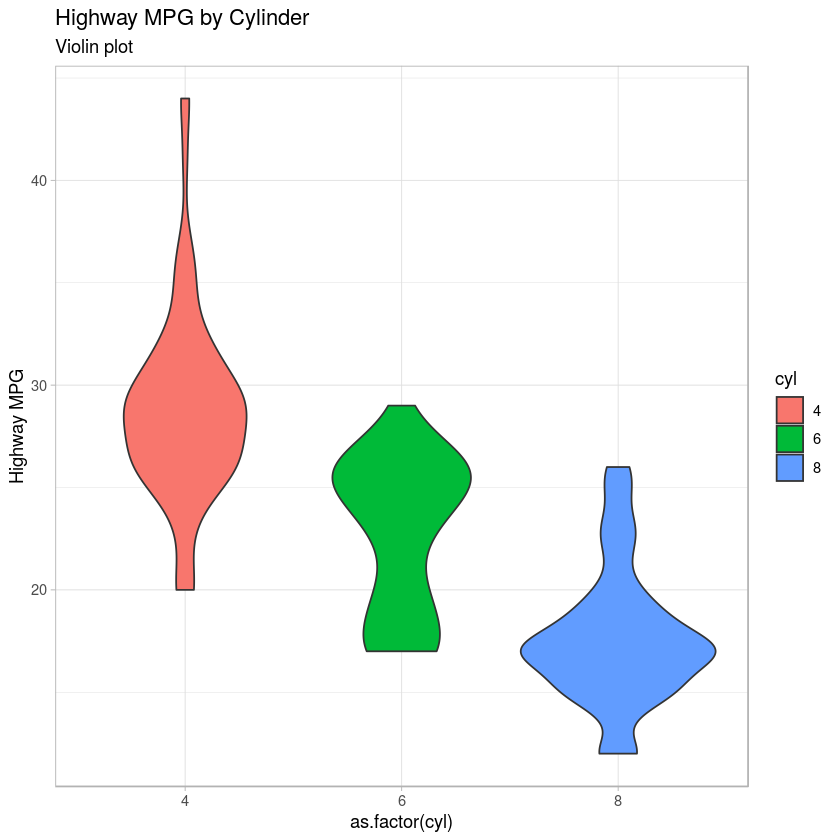

In [46]:
# Violin of mpg x=cyl, y=hwy, fill=cyl, 
# filter to 4, 6, 8 cylinders and convert to factor
# Hint: geom_violin(), as.factor(), filter(), %in%, c()
mpg %>% filter(cyl %in% c(4, 6, 8)) %>% 
   mutate(cyl=as.factor(cyl)) %>% 
   ggplot(aes(x=as.factor(cyl), y=hwy, fill=cyl)) + 
      geom_violin() +
      theme_light() +
      labs(title="Highway MPG by Cylinder",
          subtitle="Violin plot",
          y="Highway MPG")

# Summary

We calculated the variance and standard deviation as a meausre of data spread. We confirmed that the standard deviation is the square root of the variance. We calculated standard error and the z-score using the formula and finished with the use of scale to get the z-score and was able to scale all of the numeric variables in a data frame. All the while, we got a bit more comfortable with applying statistical functions in different contexts. We then look at visualizing data variance with histograms, frequency plots, density plots, and violin plots. 